In [1]:
import joblib  # -> model deployent
import numpy as np # -> Linear Algebra
import pandas as pd # -> data processing
import matplotlib.pyplot as plt #-> data handling and visulization

In [10]:
# creating our own dataset.
n=400
np.random.seed(42)

# generate data
age= np.random.randint(18,65,n)
gender= np.random.choice(['Male','Female'],n)
bmi = np.round(np.random.uniform(18.5,38,n),1)
workout = np.random.randint(0,7,n)
exercise = np.random.choice(['Gym','Cardio','yoga','Walking','None'],n)
water = np.round(np.random.randint(1.0, 5.0,n),1)
meals = np.random.randint(2,5,n)

# create dataframe 
df= pd.DataFrame({ 'Age': age, 'Gender': gender, 'BMI': bmi, 'Workout_Freq': workout, 
    'Physical_Exercise': exercise, 'Water_Intake': water, 
    'Daily_Meals_Freq': meals})


In [11]:
print(df)

     Age  Gender   BMI  Workout_Freq Physical_Exercise  Water_Intake  \
0     56    Male  26.0             4               Gym             1   
1     46  Female  32.9             2              yoga             1   
2     32    Male  36.3             2              yoga             3   
3     60    Male  37.2             0              None             2   
4     25  Female  19.6             3              None             4   
..   ...     ...   ...           ...               ...           ...   
395   45    Male  23.5             1              yoga             1   
396   51    Male  22.3             2              None             3   
397   19    Male  28.4             1              None             2   
398   49  Female  30.1             1              yoga             3   
399   40  Female  25.1             5              None             2   

     Daily_Meals_Freq  
0                   3  
1                   3  
2                   2  
3                   2  
4              

In [12]:
# convert data into csv(comma seperated values)
df.to_csv('health_data.csv',index=False)

In [13]:
df.head()

,Age,Gender,BMI,Workout_Freq,Physical_Exercise,Water_Intake,Daily_Meals_Freq
0,56,Male,26.0,4,Gym,1,3
1,46,Female,32.9,2,yoga,1,3
2,32,Male,36.3,2,yoga,3,2
3,60,Male,37.2,0,None,2,2
4,25,Female,19.6,3,None,4,2


In [14]:
df.tail()

,Age,Gender,BMI,Workout_Freq,Physical_Exercise,Water_Intake,Daily_Meals_Freq
395,45,Male,23.5,1,yoga,1,2
396,51,Male,22.3,2,None,3,3
397,19,Male,28.4,1,None,2,2
398,49,Female,30.1,1,yoga,3,3
399,40,Female,25.1,5,None,2,4


Define Lifestyle Score(0-10)

In [30]:
def health_recommender_sysstem(user):
    """
    Analyze a user's health metrics and provide personalised recommendations.
    This function takes age, gender, bmi, workout_frequency, physical_exercise, 
    water_intake, daily_meals_freqency as an input and genrate a lifestyle score based 
    on these metrics, it generated targeted lifestyle recommendations and canculates an 
    overal lifestyle score out of 10.
    """
    recommendations =[]
    score = 0
    #BMI 
    if user['BMI'] <18.5:
        recommendations.append("Increase calorie intake with balanced protein meals (underweight)")
        score+=6
    elif user['BMI'] <=24.9:
        recommendations.append("Your BMI is in a healthy range- maintain your current diet and activity.")
        score+=9
    elif user['BMI'] >30.0:
        recommendations.append("Slightly overweight - focus on moderate cardio and portionn control.")
        score+=7
    else:
        recommendations.append("High BMI - increase cardio and strength training")
        
    # Water intake
    if user['water_intake (liters)']<1.5:
        recommendations.append("Increase water intake to at least 2.5 liters per day")
        score+=5
    elif user['water_intake (liters)']<2.5:
        recommendations.append("drink slightly more water, aim for 2.5 liters per day")
        score+=7
    else:
        recommendations.append("Excellent hydration habits! keep it up")
        score+=9
        
    # Workout Frequency (Days per week)
    if user['workout_frequency'] < 2:
        recommendations.append("Low activity level. Aim for at least 3 days of movement to boost metabolism.")
        score += 4
    elif user['workout_frequency'] <= 4:
        recommendations.append("Good consistency! Consider adding one active recovery day (walking/stretching).")
        score += 8
    else:
        recommendations.append("Highly active! Ensure you are getting enough sleep and protein for recovery.")
        score += 10

    # Physical Exercise Type
    # We use .lower() to handle different ways users might type it
    exercise = user['physical_exercise'].lower()
    if exercise == 'none':
        recommendations.append("Starting a basic walking routine can significantly improve your heart health.")
        score += 2
    elif exercise in ['walking', 'yoga']:
        recommendations.append(f"Great job with {exercise}. Try incorporating light resistance training twice a week.")
        score += 6
    elif exercise in ['gym', 'cardio']:
        recommendations.append(f"Excellent choice with {exercise}. Focus on progressive overload to see continuous results.")
        score += 9

    # Daily Meals Frequency
    # Research suggests 3-5 meals is optimal for most gym beginners to maintain energy
    if user['daily_meals_frequency'] < 3:
        recommendations.append("Eating too infrequently can lead to energy crashes. Try smaller, frequent nutrient-dense snacks.")
        score += 5
    elif 3 <= user['daily_meals_frequency'] <= 5:
        recommendations.append("Optimal meal frequency for stable blood sugar and muscle synthesis.")
        score += 10
    else:
        recommendations.append("High meal frequency. Ensure you are tracking total calories to avoid overeating.")
        score += 7
        


    # Final Calculation 
    # Since we added many scores, you might want to normalize it to a 0-10 scale
    lifestyle_score = round(score / 5, 2) 
    recommendations.append(f"Estimated Lifestyle Score: {lifestyle_score}/10")
    
    # recommendations 
    if(lifestyle_score) >= 8:
        recommendations.append("You are maintaining a healthy lifestyle! continue consistency")
    elif lifestyle_score >= 6:
        recommendations.append("Good progresss! focus on minor improvements in hydration and exercise")
    else:
        recommendations.append("needs attention -adjust nutrition,water,and activity levels.")
    return recommendations,lifestyle_score
            
    

In [40]:
def visulize_health_profile(user,lifestyle_score):
    categories =['BMI', 'Water Intake', 'Workout Frequency', 'Meal Frequency']
    values=[ 
        np.clip((25 -abs(user['BMI'] -22)) / 25*10, 0,10),  #ideal BMI~22
        np.clip(user['water_intake (liters)']/2.5*10,0,1),  #ideal water 2.5L
        np.clip(user['workout_frequency']/5*10,0,10),  #ideal 4-5 days
        np.clip(user['daily_meals_frequency']/4*10,0,10)  #ideal 3-5 meals
                 ]
    plt.figure(figsize=(8,10))
    bars = plt.bar(categories,values,color =[ '#66b3ff','#99ff99','#ffcc99','#ff9999'])
    plt.ylim(0,10)
    plt.title(f'Health profile Score (Lifestyle = {lifestyle_score }/10', fontsize =14, fontweight='bold')
    plt.ylabel("Health Level (0-10)")
    plt.grid(axis='y', linestyle='--',alpha=0/7)
    # Annotate bars
    for bar,val in zip(bars,values):
        plt.text(bar.get_x() + bar.get_width() /2, val+0.3, f'{val:.1f}', ha='center',fontsize=10)
        
    plt.show()

#Test the system

In [41]:
# example user data
user={
    'Age':28,
    'Gender':'Male',
    'BMI':27.5,
    'workout_frequency':2,
    'physical_exercise':'cardio',
    'water_intake (liters)':1.4,
    'daily_meals_frequency':2
}
recommendations, lifestyle_score = health_recommender_sysstem(user)
print("personalized Health Recommendations:\n")
for rec in recommendations:
    print("-",rec)



personalized Health Recommendations:

- High BMI - increase cardio and strength training
- Increase water intake to at least 2.5 liters per day
- Good consistency! Consider adding one active recovery day (walking/stretching).
- Excellent choice with cardio. Focus on progressive overload to see continuous results.
- Eating too infrequently can lead to energy crashes. Try smaller, frequent nutrient-dense snacks.
- Estimated Lifestyle Score: 5.4/10
- needs attention -adjust nutrition,water,and activity levels.


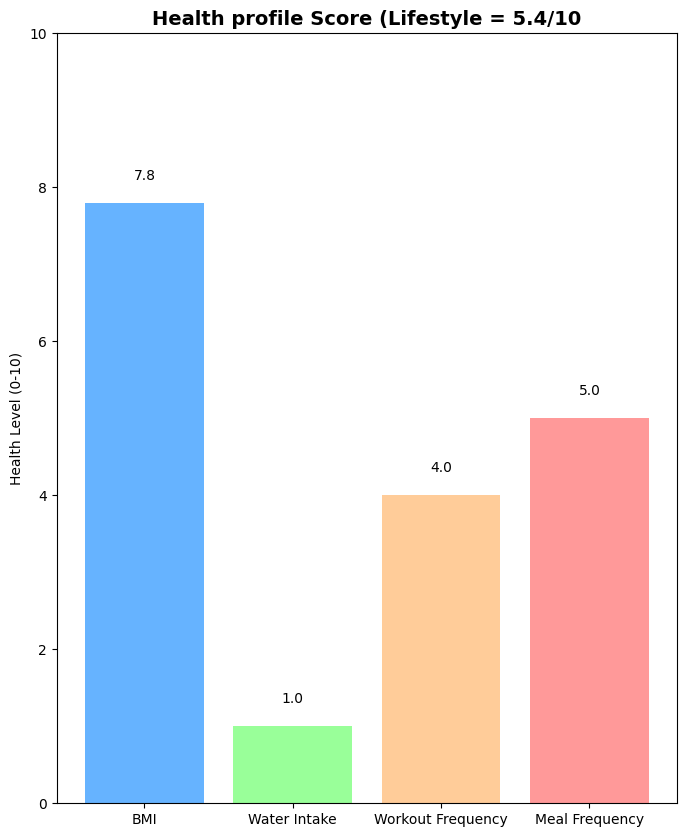

In [42]:
# visulization
visulize_health_profile(user,lifestyle_score)

In [ ]:
# save model for deployment
